In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of properties
num_properties = 500

# Generate random mock data
data = {
    "Property_ID": np.arange(1, num_properties + 1),
    "Neighborhood": np.random.choice(["Downtown", "Midtown", "West Jackson", "East Jackson", "South Jackson"], num_properties),
    "Housing_Condition": np.random.choice(["Good", "Needs Repair", "Blighted"], num_properties, p=[0.6, 0.3, 0.1]),
    "Median_Income": np.random.randint(20000, 80000, num_properties),  # Simulated census income data
    "Property_Value": np.random.randint(30000, 250000, num_properties),  # Simulated property values
    "Age_of_Home": np.random.randint(20, 100, num_properties),  # Simulated home ages
    "Flood_Risk": np.random.choice(["Low", "Medium", "High"], num_properties, p=[0.5, 0.3, 0.2]),  # Flood risk levels
    "Heat_Vulnerability": np.random.uniform(0, 1, num_properties)  # Heat index risk (0 = Low, 1 = High)
}

# Create DataFrame
df = pd.DataFrame(data)

# Categorizing Blight as Binary for analysis (1 = Blighted, 0 = Not Blighted)
df["Blight_Flag"] = df["Housing_Condition"].apply(lambda x: 1 if x == "Blighted" else 0)

# Save the dataset as a CSV file
csv_filename = "mock_housing_blight_data.csv"
df.to_csv(csv_filename, index=False)

print(f"Dataset saved as {csv_filename}. You can now open it in Excel, Power BI, or any data tool.")

Dataset saved as mock_housing_blight_data.csv. You can now open it in Excel, Power BI, or any data tool.


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/kaggle/working/mock_housing_blight_data.csv")

# Display first few rows
df.head()

,Property_ID,Neighborhood,Housing_Condition,Median_Income,Property_Value,Age_of_Home,Flood_Risk,Heat_Vulnerability,Blight_Flag
0,1,East Jackson,Good,56220,106242,34,Medium,0.672967,0
1,2,South Jackson,Needs Repair,61874,208589,84,Medium,0.275381,0
2,3,West Jackson,Good,33859,59257,95,Medium,0.306313,0
3,4,South Jackson,Needs Repair,70460,248344,90,Medium,0.788985,0
4,5,South Jackson,Good,51419,203279,34,Low,0.446420,0


In [3]:
df.describe()

,Property_ID,Median_Income,Property_Value,Age_of_Home,Heat_Vulnerability,Blight_Flag
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,50508.660000,142210.292000,56.904000,0.499971,0.106000
std,144.481833,17155.362616,62965.893688,23.134329,0.292859,0.308146
min,1.000000,20060.000000,30281.000000,20.000000,0.000135,0.000000
25%,125.750000,35924.500000,87588.000000,37.000000,0.269584,0.000000
50%,250.500000,50097.500000,144838.000000,55.000000,0.486609,0.000000
75%,375.250000,65477.000000,193464.250000,77.000000,0.761824,0.000000
max,500.000000,79805.000000,249724.000000,99.000000,0.997821,1.000000


In [4]:
df.isnull().sum()

Property_ID           0
Neighborhood          0
Housing_Condition     0
Median_Income         0
Property_Value        0
Age_of_Home           0
Flood_Risk            0
Heat_Vulnerability    0
Blight_Flag           0
dtype: int64

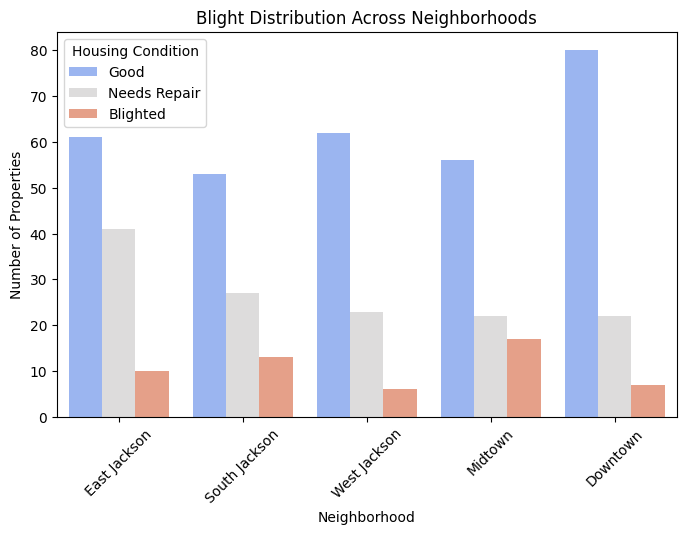

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Neighborhood", hue="Housing_Condition", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Blight Distribution Across Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Properties")
plt.legend(title="Housing Condition")
plt.show()

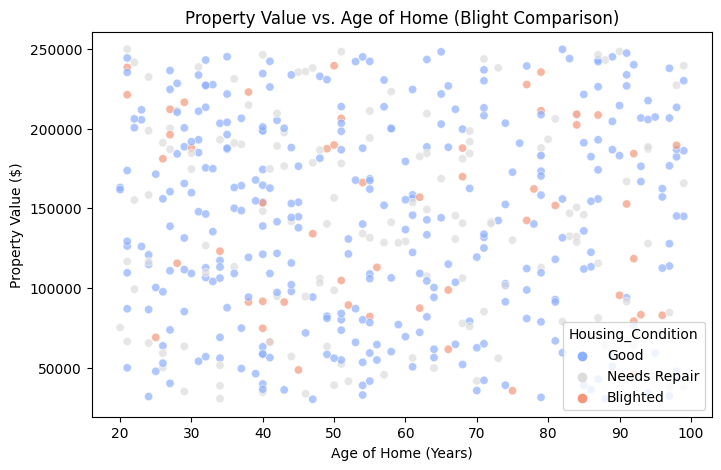

In [6]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Age_of_Home", y="Property_Value", hue="Housing_Condition", palette="coolwarm", alpha=0.7)
plt.title("Property Value vs. Age of Home (Blight Comparison)")
plt.xlabel("Age of Home (Years)")
plt.ylabel("Property Value ($)")
plt.show()

✅ Images saved! You can now download them from the output directory.


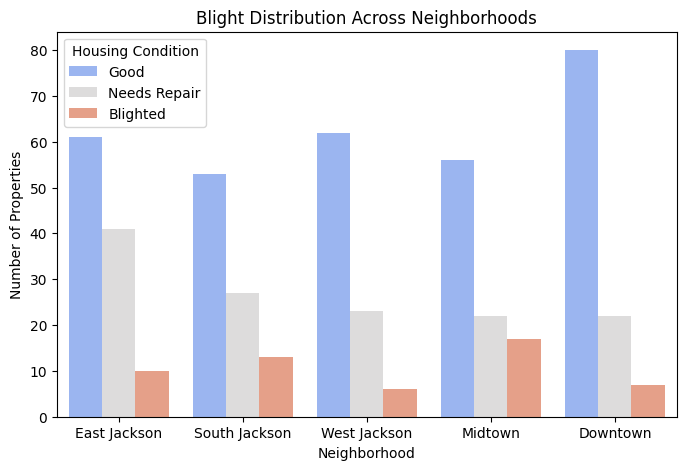

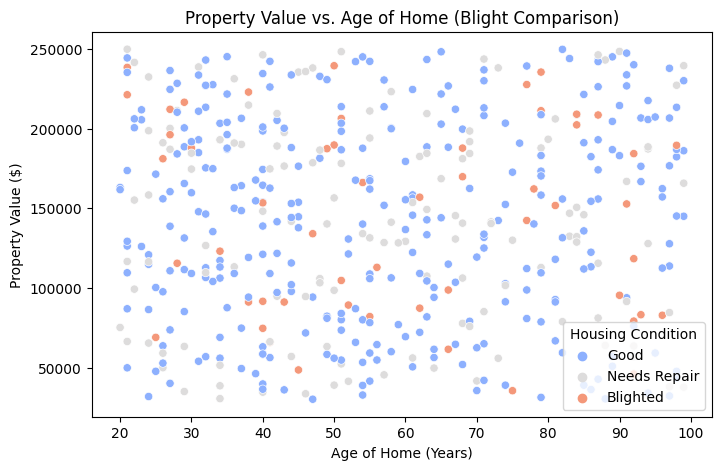

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Save Blight Distribution Chart
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Neighborhood", hue="Housing_Condition", palette="coolwarm")
plt.title("Blight Distribution Across Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Properties")
plt.legend(title="Housing Condition")
plt.savefig("/kaggle/working/blight_distribution.png", dpi=300)  # Saves as PNG file

# Save Property Value vs. Age of Home Chart
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Age_of_Home", y="Property_Value", hue="Housing_Condition", palette="coolwarm")
plt.title("Property Value vs. Age of Home (Blight Comparison)")
plt.xlabel("Age of Home (Years)")
plt.ylabel("Property Value ($)")
plt.legend(title="Housing Condition")
plt.savefig("/kaggle/working/property_value_vs_age.png", dpi=300)  # Saves as PNG file

print("✅ Images saved! You can now download them from the output directory.")